In [56]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [57]:
from keras.datasets import cifar10

In [58]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [59]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [60]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [61]:
x_train.dtype


dtype('float64')

In [62]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [63]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [64]:
num_classes= len(np.unique(y_train))

In [65]:
num_classes

10

In [66]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [67]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)


In [68]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [69]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [70]:
print(y_valid.shape)
print(x_valid.shape)


(5000, 10)
(5000, 32, 32, 3)


In [71]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [72]:
model=Sequential()

In [73]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [74]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))



In [75]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [77]:
model.add(Flatten())

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [79]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [80]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [81]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [82]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [84]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 36s - loss: 2.0813 - accuracy: 0.1782 - val_loss: 1.9262 - val_accuracy: 0.2288 - 36s/epoch - 402ms/step
Epoch 2/10
90/90 - 34s - loss: 1.8418 - accuracy: 0.2601 - val_loss: 1.7939 - val_accuracy: 0.2994 - 34s/epoch - 376ms/step
Epoch 3/10
90/90 - 32s - loss: 1.6902 - accuracy: 0.3265 - val_loss: 1.6314 - val_accuracy: 0.3598 - 32s/epoch - 361ms/step
Epoch 4/10
90/90 - 36s - loss: 1.5850 - accuracy: 0.3813 - val_loss: 1.5434 - val_accuracy: 0.4100 - 36s/epoch - 398ms/step
Epoch 5/10
90/90 - 34s - loss: 1.5325 - accuracy: 0.4127 - val_loss: 1.5288 - val_accuracy: 0.4226 - 34s/epoch - 383ms/step
Epoch 6/10
90/90 - 33s - loss: 1.4655 - accuracy: 0.4496 - val_loss: 1.4354 - val_accuracy: 0.4646 - 33s/epoch - 364ms/step
Epoch 7/10
90/90 - 36s - loss: 1.3946 - accuracy: 0.4861 - val_loss: 1.3830 - val_accuracy: 0.4952 - 36s/epoch - 396ms/step
Epoch 8/10
90/90 - 32s - loss: 1.3465 - accuracy: 0.5072 - val_loss: 1.3375 - val_accuracy: 0.5174 - 32s/epoch - 360ms/step
Epoch 9/

In [90]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2754 - accuracy: 0.5408


In [91]:
results

[1.2753546237945557, 0.5407999753952026]

In [92]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

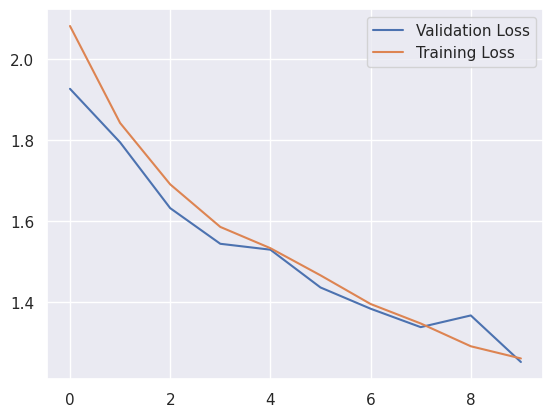

In [93]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

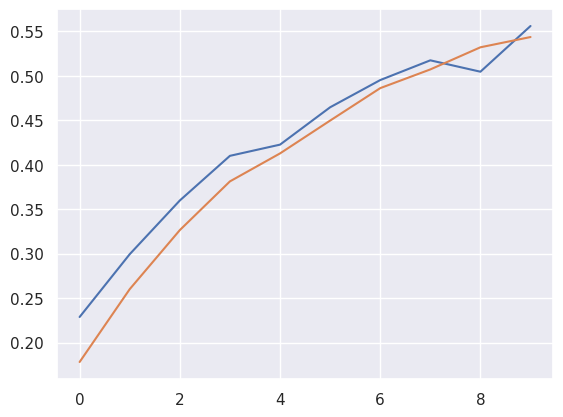

In [94]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;